# Project 4: Wrangling & Analyzing "WeRateDogs" Data

<a id='toc'></a>
## Contents:
- [Introduction to Project](#int)
- [Step 1: Data Collection](#collect)
- [Step 2: Data Assessment](#assess)
   - [2.1 Quality Assessment](#quality)
   - [2.2 Tidiness Assessment](#tidiness)
- [Step 3: Data Cleaning](#clean)
   - [2.1 Quality Clean-up](#qcl)
   - [2.2 Tidiness Clean-up](#tcl)
- [Step 4: Data Storage, Analysis & Visualization](#sav)
   - [4.1 Insight 1](#one)
   - [4.2 Insight 2](#two)
   - [4.3 Insight 3](#three)
   - [4.4 Insight 4](#four)
- [Conclusion](#con)   

<a id='int'></a>
## Introduction to Project
[Back to Table of Contents](#toc)

This project aims at practicing data wrangling techniques to process data so as to make it ready for analysis and visualzations. data set being used os of a twitter initiative @dog_rates, aka WeRateDogs who rate dogs, usually as 11/10 :) 

<a id='collect'></a>
## Data Collection
[Back to Table of Contents](#toc)

- **Twitter archive:** The file was downloaded manually, provided in udacity course: twitter_archive_enhanced.csv

- **Tweet image predictions**, image_predictions.tsv was downloaded using the Requests library with URL given below: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count, and anything else found interesting was included. Each tweet's entire json data was written in tweet_json.txt file.

#### Import Libraries:

In [347]:
#casual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#new imports
import requests
import json  
import tweepy

**1. Twitter Archive**

In [348]:
df_tw = pd.read_csv('twitter-archive-enhanced.csv')
#df_tw.head()
#just checked it and closed it, to save the length of file. I'd show it later on in assessment part

**2. Tweet image prediction**

In [349]:
#getting imag predictions file with the web address provided
address = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(address)
open('image_predictions.tsv', 'wb').write(req.content)

#assigning it to a df
df_img = pd.read_csv('image-predictions.tsv', sep='\t' )
#df_img.head() #would open it in assessment part

**3. JSON Data:**

In [4]:
from tweepy import OAuthHandler
import time

my_key = 'it was deleted as asked'
my_secret = 'it was deleted as asked'
my_token = 'it was deleted as asked'
my_access = 'it was deleted as asked'

auth = OAuthHandler(my_key, my_secret)
auth.set_access_token(my_token, my_access)

api = tweepy.API(auth, wait_on_rate_limit_notify = True, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True)

ti=time.time()
#Getting status of each tweet
lst_tw = []
# lst_no_tw contains the list of tweets we didn't get
lst_no_tw = []
for tweet_id in df_tw['tweet_id']:   
    try:
        lst_tw.append(api.get_status(tweet_id))
    except Exception as e:
        lst_no_tw.append(tweet_id)

tf=time.time()
print(f'total time taken is:{tf-ti}')

Rate limit reached. Sleeping for: 746
Rate limit reached. Sleeping for: 745
total time taken is:1906.2217152118683


In [350]:
print(f"Tweets: {len(lst_tw)}")
print(f"Failed Tweets: {len(lst_no_tw)}")

Tweets: 2331
Failed Tweets: 25


In [351]:
#Separately appending json part in list of dictionaries
lst_dic = []
for jsn_tw in lst_tw:
    lst_dic.append(jsn_tw)

In [352]:
#writing that list in tweet_json.txt
open('tweet_json.txt', 'w').write(json.dumps(lst_dic, indent=4))

17487021

In [353]:
#labelling all interesting things to keep and creating a df out of it
lst_new = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    jsn_fil = json.load(json_file)
    for jsn_dic in jsn_fil:
        tweet_id = jsn_dic['id']
        tw_txt = jsn_dic['text']
        http = tw_txt[tw_txt.find('https'):]
        retw_cnt = jsn_dic['retweet_count']
        fav_cnt = jsn_dic['favorite_count']
        jsn_src = jsn_dic['source']
        fan_cnt = jsn_dic['user']['followers_count']      
        dev =jsn_src[jsn_src.find('rel="nofollow">') + 15:-4]
        frnd_cnt = jsn_dic['user']['friends_count']
        source = dev
        retw_stat = jsn_dic['retweeted_status'] = jsn_dic.get('retweeted_status', 'Original tweet')
        if retw_stat == 'Original tweet':
            web_address = http
        else:
            retw_stat = 'We have a retweet over here' 
            web_address = 'We have a retweet over here'

        lst_new.append({'tweet_id': str(tweet_id),'retweet_count': int(retw_cnt),'favorite_count': int(fav_cnt),
                             'url': web_address,'followers_count': int(fan_cnt),'source': source,
                             'friends_count': int(frnd_cnt),'retweeted_status': retw_stat})
        df_jsn = pd.DataFrame(lst_new, columns = ['tweet_id', 'favorite_count','retweet_count', 'followers_count', 'friends_count','source', 'retweeted_status', 'url'])

In [354]:
#df_jsn.head() #would see it in assessment section, here I just checked it works

<a id='assess'></a>
## Step 2: Data Assessment
[Back to Table of Contents](#toc)

In [355]:
#just checked all dataframes by opening them for visual Inspection
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [356]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [357]:
df_jsn

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35689,7547,8847834,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30867,5595,8847834,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23205,3707,8847834,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38987,7728,8847834,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37240,8329,8847834,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18776,2795,8847834,17,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10908,1813,8847834,17,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,60144,16886,8847834,17,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25828,3849,8847834,17,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29496,6566,8847834,17,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [358]:
#sorting it
df_tw.sort_values('timestamp')
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [359]:
df_tw['tweet_id'].duplicated().sum()

0

In [360]:
df_tw.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [361]:
print(df_tw.loc[df_tw.rating_numerator == 1176, 'text'])
print(df_tw.loc[df_tw.rating_numerator == 666, 'text']) 
print(df_tw.loc[df_tw.rating_numerator == 204, 'text']) 
print(df_tw.loc[df_tw.rating_numerator == 144, 'text'])
print(df_tw.loc[df_tw.rating_numerator == 143, 'text']) 

Series([], Name: text, dtype: object)
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object


In [362]:
#checking numerators and denominators of ratings
print(df_tw['text'][1779]) # dogs:12
print(df_tw['text'][1634]) # dogs:13
print(df_tw['text'][1120]) # dogs:17
print(df_tw['text'][313]) #for actual ratings, ignored while clean up
print(df_tw['text'][189]) #containes no picture, would be ignored while cleansing

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10


In [363]:
df_tw.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [364]:
print(df_tw.loc[df_tw.rating_denominator == 2, 'text']) 
print(df_tw.loc[df_tw.rating_denominator == 7, 'text'])
print(df_tw.loc[df_tw.rating_denominator == 11, 'text']) 
print(df_tw.loc[df_tw.rating_denominator == 15, 'text'])
print(df_tw.loc[df_tw.rating_denominator == 16, 'text']) 

2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object


In [365]:
print(df_tw['text'][342]) #not rated, can be deleted
print(df_tw['text'][516]) #not rated, can be deleted
print(df_tw['text'][784]) #retweeted, can be deleted
print(df_tw['text'][1068]) #changing manually
print(df_tw['text'][1662]) #changing manually
print(df_tw['text'][1663]) #to explain rating
print(df_tw['text'][2335]) #changing manually

@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [366]:
with pd.option_context('max_colwidth', 200):
    display(df_tw[df_tw['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [367]:
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
505,675891555769696257,https://pbs.twimg.com/media/CWE_x33UwAEE3no.jpg,1,Italian_greyhound,0.305637,True,whippet,0.232057,True,Great_Dane,0.117806,True
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/73731...,1,cliff,0.439077,False,lakeside,0.062899,False,valley,0.039759,False
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
996,708349470027751425,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1,muzzle,0.243890,False,basenji,0.187158,True,Boston_bull,0.092727,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True


In [368]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [369]:
df_img.jpg_url.duplicated().sum()

66

In [370]:
pd.concat(m for _, m in df_img.groupby("jpg_url") if len(m) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [371]:
print(df_img.p1_dog.value_counts())
print(df_img.p2_dog.value_counts())
print(df_img.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [372]:
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [373]:
df_jsn.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2024,671504605491109889,6616,3345,8847814,17,Twitter for iPhone,Original tweet,https://t.co/mGW5c50mPA
52,881906580714921986,22552,3049,8847835,17,Twitter for iPhone,Original tweet,https://t.co/503CgWbhxQ
1481,691793053716221953,8002,4132,8847851,17,Vine - Make a Scene,Original tweet,https://t.co/qnMJHBxPuo
1862,674788554665512960,774,199,8847814,17,Twitter for iPhone,Original tweet,https://t.co/P3ElQ2wsjb
1696,680145970311643136,3534,1698,8847853,17,Twitter for iPhone,Original tweet,https://t.co/N5pM6WBx7e
512,808344865868283904,42795,20939,8847837,17,Vine - Make a Scene,Original tweet,https://t.co/hfi264QwYM
99,872620804844003328,19326,3297,8847836,17,Twitter for iPhone,Original tweet,https://t.co/lUcpnZDPz9
1341,702684942141153280,3174,1053,8847852,17,Twitter for iPhone,Original tweet,https://t.co/d2b5C2R0aO
1630,683449695444799489,3811,1578,8847853,17,Twitter for iPhone,Original tweet,https://t.co/1Z7Q6svWpe
1329,703769065844768768,3212,1120,8847852,17,Twitter for iPhone,Original tweet,https://t.co/QQZDCYl6zT


In [374]:
df_jsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [375]:
df_jsn.retweeted_status.value_counts()

Original tweet                 2168
We have a retweet over here     163
Name: retweeted_status, dtype: int64

In [376]:
df_jsn.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

<a id='quality'></a>
### 2.1: Quality Assessment
[Back to Table of Contents](#toc)

**df_tw**

- shouold keep actual ratings, only also having images
- redundant/useless columns to be droppedv
- data type issues of these columns: puppo, pupper, doggo & floofer
- denominators other than 10
- numerators having decimals
- date and time to be segregated in individual columns



**df_img**

- A column for image predictions & a column for confidence level to be made
- redundant columns to be deleted
- duplicate jpg urls to be deleted

**df_jsn**
- original tweets only

<a id='tidiness'></a>
### 2.2: Tidiness Assessment
[Back to Table of Contents](#toc)

- tables to be combined as a data set
- tweet_id data type needs to change to int

<a id='clean'></a>
## Step 3: Data Cleaning
[Back to Table of Contents](#toc)

In [377]:
#creating new data frames by copying original ones
df_tw_clean = df_tw.copy()
df_img_clean = df_img.copy()
df_jsn_clean = df_jsn.copy()

<a id='qcl'></a>
### 3.1 Quality Clean-up 

**df_tw**

- df_tw: shouold keep actual ratings, only also having images

In [378]:
df_tw_clean = df_tw_clean[pd.isnull(df_tw_clean['retweeted_status_user_id'])]
df_tw_clean.retweeted_status_user_id.value_counts().sum()

0

- df_tw: redundant/useless columns to be droppedv

In [379]:
df_tw_clean.info()
df_tw_clean = df_tw_clean.drop(['retweeted_status_timestamp', 'in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id', 'retweeted_status_user_id', 'source', 'expanded_urls'], 1)

list(df_tw_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

- df_tw: data type issues of these columns: puppo, pupper, doggo & floofer

In [380]:
#here melting columns titled as doggo, pupper, floofer, puppo to columns named as dogs and dogs_stage
df_tw_clean = pd.melt(df_tw_clean, id_vars=['rating_denominator','text','timestamp','rating_numerator','tweet_id',
                                                                'name'],var_name='dogs', value_name='dogs_stage')
#dropping dogs columns
df_tw_clean = df_tw_clean.drop('dogs', 1) 
#dropping duplicates
df_tw_clean = df_tw_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last') 
df_tw_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

- df_tw: denominators other than 10

In [381]:
#changing rating fractions
df_tw_clean.loc[(df_tw_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
df_tw_clean.loc[(df_tw_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

df_tw_clean.loc[(df_tw_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
df_tw_clean.loc[(df_tw_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

df_tw_clean.loc[(df_tw_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
df_tw_clean.loc[(df_tw_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

df_tw_clean.loc[(df_tw_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
df_tw_clean.loc[(df_tw_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

df_tw_clean.loc[(df_tw_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
df_tw_clean.loc[(df_tw_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

#tweets not having actual ratings
df_tw_clean = df_tw_clean[df_tw_clean['tweet_id'] != 682808988178739200]
df_tw_clean = df_tw_clean[df_tw_clean['tweet_id'] != 835246439529840640]
df_tw_clean = df_tw_clean[df_tw_clean['tweet_id'] != 832088576586297345]
df_tw_clean = df_tw_clean[df_tw_clean['tweet_id'] != 686035780142297088]
df_tw_clean = df_tw_clean[df_tw_clean['tweet_id'] != 810984652412424192]

#checking
with pd.option_context('max_colwidth', 200):
    display(df_tw_clean[df_tw_clean['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70


In [382]:
#made rating column as float type
df_tw_clean['rating'] = 10 * df_tw_clean['rating_numerator'] / df_tw_clean['rating_denominator'].astype(float)

df_tw_clean.sample(5)


,rating_denominator,text,timestamp,rating_numerator,tweet_id,name,dogs_stage,rating
2997,10,This is Duke. He permanently looks like he jus...,2016-06-30 01:15:31 +0000,11.0,748324050481647620,Duke,None,11.0
3872,10,Say hello to Oliver. He thought what was insid...,2015-12-11 00:35:44 +0000,8.0,675111688094527488,Oliver,None,8.0
3265,10,This is Vince. He's a Gregorian Flapjeck. Whit...,2016-03-14 23:19:03 +0000,9.0,709519240576036864,Vince,None,9.0
5528,10,This pupper doesn't understand gates. 10/10 so...,2016-02-27 02:32:12 +0000,10.0,703407252292673536,None,pupper,10.0
4104,10,This dog can't see its haters. 11/10 https://t...,2015-11-28 04:03:11 +0000,11.0,670452855871037440,None,None,11.0


- df_tw: numerators having decimals

In [383]:

df_tw_clean[['rating_numerator', 'rating_denominator']] = df_tw_clean[['rating_numerator','rating_denominator']].astype(float)

df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 2095 to 7298
Data columns (total 8 columns):
rating_denominator    2170 non-null float64
text                  2170 non-null object
timestamp             2170 non-null object
rating_numerator      2170 non-null float64
tweet_id              2170 non-null int64
name                  2170 non-null object
dogs_stage            2170 non-null object
rating                2170 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 152.6+ KB


In [384]:
#changing numerators
df_tw_clean.loc[(df_tw_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_tw_clean.loc[(df_tw_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_tw_clean.loc[(df_tw_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_tw_clean.loc[(df_tw_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_tw_clean.loc[(df_tw_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
#checking
with pd.option_context('max_colwidth', 200):
    display(df_tw_clean[df_tw_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


- df_tw: date and time to be segregated in individual columns

In [385]:
#changing timestamp column to datetime format
df_tw_clean['timestamp'] = pd.to_datetime(df_tw_clean['timestamp'])

#segregating parts of date and time
df_tw_clean['year'] = df_tw_clean['timestamp'].dt.year
df_tw_clean['month'] = df_tw_clean['timestamp'].dt.month
df_tw_clean['day'] = df_tw_clean['timestamp'].dt.day

#deleted old timestamp
df_tw_clean = df_tw_clean.drop('timestamp', 1)

list(df_tw_clean)

['rating_denominator',
 'text',
 'rating_numerator',
 'tweet_id',
 'name',
 'dogs_stage',
 'rating',
 'year',
 'month',
 'day']

**df_img**

- df_img: duplicate jpg urls to be deleted

In [386]:
#dropping duplicated web addresses
df_img_clean = df_img_clean.drop_duplicates(subset=['jpg_url'], keep='last')
sum(df_img_clean['jpg_url'].duplicated())

0

- df_img: A column for image predictions & a column for confidence level to be made

In [387]:
#first prediction to be enlisted
lst_conf = []
lst_dog = []

#getting dog type and conf. level from p1,p2,p3
def image(df_img_clean):
    if df_img_clean['p1_dog'] == True:
        lst_dog.append(df_img_clean['p1'])
        lst_conf.append(df_img_clean['p1_conf'])
    elif df_img_clean['p2_dog'] == True:
        lst_dog.append(df_img_clean['p2'])
        lst_conf.append(df_img_clean['p2_conf'])
    elif df_img_clean['p3_dog'] == True:
        lst_dog.append(df_img_clean['p3'])
        lst_conf.append(df_img_clean['p3_conf'])
    else:
        lst_dog.append('Error')
        lst_conf.append('Error')

df_img_clean.apply(image, axis=1)

#storing these new entities
df_img_clean['dog_type'] = lst_dog
df_img_clean['confidence_list'] = lst_conf
#deleting where we get error
df_img_clean = df_img_clean[df_img_clean['dog_type'] != 'Error']

df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


- df_img: redundant columns to be deleted

In [388]:
print(list(df_img_clean))
df_img_clean = df_img_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], 1)

list(df_img_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

**df_jsn**

- df_jsn: original tweets only

In [389]:
df_jsn_clean = df_jsn_clean[df_jsn_clean['retweeted_status'] == 'Original tweet']
df_jsn_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

<a id='tcl'></a>
### 3.2 Tidiness Clean-up
[Back to Table of Contents](#toc)

- tweet_id data type needs to change to int

In [390]:
#converting str to int
df_jsn_clean['tweet_id'] = df_jsn_clean['tweet_id'].astype(int)
df_jsn_clean['tweet_id'].dtypes

dtype('int64')

- tables to be made as a data set

In [391]:
#merging df
df_tw_mg = pd.merge(df_tw_clean,df_img_clean,how = 'left', on = ['tweet_id'])
#tweets having images to be kept
df_tw_mg = df_tw_mg[df_tw_mg['jpg_url'].notnull()]

df_tw_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
rating_denominator    1625 non-null float64
text                  1625 non-null object
rating_numerator      1625 non-null float64
tweet_id              1625 non-null int64
name                  1625 non-null object
dogs_stage            1625 non-null object
rating                1625 non-null float64
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [392]:
#creating a single final merged data set
df_mg = pd.merge(df_tw_mg, df_jsn_clean, how = 'left', on = ['tweet_id'])
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 20 columns):
rating_denominator    1625 non-null float64
text                  1625 non-null object
rating_numerator      1625 non-null float64
tweet_id              1625 non-null int64
name                  1625 non-null object
dogs_stage            1625 non-null object
rating                1625 non-null float64
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
favorite_count        1619 non-null float64
retweet_count         1619 non-null float64
followers_count       1619 non-null float64
friends_count         1619 non-null float64
source                1619 non-null object
retweeted_status      1619 non-null object
url                   1619 non-null object
dtypes: float64(7), int64(4), 

In [393]:
# After plotting graphs at the end, I found some errors, so I came back here and resolved them
df_mg.loc[(df_mg.tweet_id == 786709082849828864), 'rating'] = 9.75
df_mg.loc[(df_mg.tweet_id == 680494726643068929), 'rating'] = 11.26
df_mg.loc[(df_mg.tweet_id == 778027034220126208), 'rating'] = 11.27
df_mg['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

<a id='sav'></a>
## Step 4: Data Storage, Analysis & Visualization
[Back to Table of Contents](#toc)

In [394]:
df_mg.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

<a id='one'></a>
### 4.1 Insight 1:

In [395]:
df_mg['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
Staffordshire_bullterrier          20
Shetland_sheepdog                  19
Rottweiler                         19
beagle                             19
Maltese_dog                        19
Cardigan                           19
kuvasz                             18
Lakeland_terrier                   17
basset      

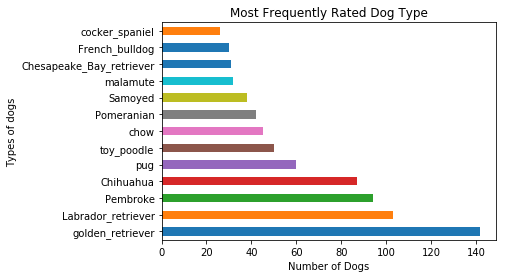

In [396]:
df_dog_type = df_mg.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Most Frequently Rated Dog Type')
plt.xlabel('Number of Dogs')
plt.ylabel('Types of dogs')
fig = plt.gcf() 
fig.savefig('dogbar.png',bbox_inches='tight');

>**Inference:** 
Golden retrieve got most number of ratings, or we can say its most frequently occurring do type. Conversely, cocker spaniel is on the bottom. It doesn't mean they get less ratings, it means they get ratings lesser number of times as compared to others. 

In [397]:
from IPython.display import Image
#print(df_mg.loc[df_mg.dog_type == 'golden_retriever', 'jpg_url'])
#image of a random golden retreiver
Image(url = '  https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg')

<a id='two'></a>
### 4.2 Insight 2:
[Back to Table of Contents](#toc)

In [398]:
df_dog_avg = df_mg.groupby('dog_type').mean()

In [399]:
df_dog_avg.head()

,rating_denominator,rating_numerator,tweet_id,rating,year,month,day,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,10.0,8.000000,8.095999e+17,8.000000,2016.500000,6.00,16.000000,10979.000000,3080.500000,8.847837e+06,17.0
Airedale,10.0,9.833333,7.184489e+17,9.833333,2015.583333,8.75,15.916667,4760.666667,1201.416667,8.847836e+06,17.0
American_Staffordshire_terrier,10.0,10.312500,7.597284e+17,10.312500,2016.187500,5.25,15.000000,7615.466667,1774.533333,8.847840e+06,17.0
Appenzeller,10.0,11.000000,7.939334e+17,11.000000,2016.500000,4.50,18.500000,6609.000000,1241.000000,8.847842e+06,17.0
Australian_terrier,10.0,11.500000,7.785921e+17,11.500000,2016.500000,3.50,7.000000,10066.500000,2685.500000,8.847844e+06,17.0


In [400]:
df_dog_sort = df_dog_avg['rating'].sort_values()
df_dog_sort

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
Norwich_terrier                 9.600000
miniature_schnauzer             9.600000
redbone                         9.666667
English_setter                  9.714286
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniatu

In [401]:
print(df_mg.loc[df_mg.dog_type == 'Japanese_spaniel', 'jpg_url'])
Image(url = 'https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg')

710    https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg
Name: jpg_url, dtype: object


>**Inference:**
    we can see that Bouvier_des_Flandres has got the highest average ratings, whilst japanese spaniel has got the lowest

<a id='three'></a>
### 4.3 Insight 3:
[Back to Table of Contents](#toc)

In [402]:
df_dog_cnt = df_mg.groupby('dog_type').count()
df_dog_cnt

,rating_denominator,text,rating_numerator,tweet_id,name,dogs_stage,rating,year,month,day,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [403]:
dog_cnt = df_dog_cnt['rating']
dog_avg = df_dog_avg['rating']
dog_avg

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.448276
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog             

In [404]:
df = pd.DataFrame()
df['dog_type_count'] = dog_cnt
df['dog_type_mean'] = dog_avg
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


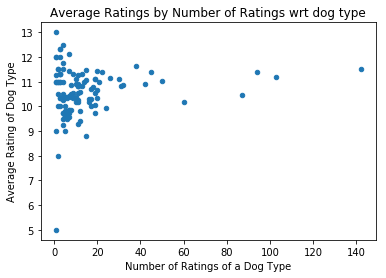

In [405]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Ratings by Number of Ratings wrt dog type')

fig = plt.gcf()
fig.savefig('insightthree.png',bbox_inches='tight');

In [406]:
#just checking outlier in graph
df.query('dog_type_mean >=25')
#there was an outlier here but I resolved it now

,dog_type_count,dog_type_mean
dog_type,,


>**Inference**
We can see from above chart that dog types which have less number of ratings show a more diverse range of mean rating values

<a id='four'></a>
### 4.4 Insight 4:
[Back to Table of Contents](#toc)

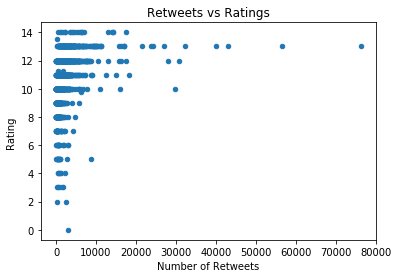

In [407]:
df_mg.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Number of Retweets')
plt.ylabel('Rating ')
plt.title('Retweets vs Ratings')

fig = plt.gcf()
fig.savefig('insightfour.png',bbox_inches='tight');

In [408]:
#checking outliers to see if there was a mistake:
df_mg.query('rating>=25')
#there were some outliers I resolved them above by going back

,rating_denominator,text,rating_numerator,tweet_id,name,dogs_stage,rating,year,month,day,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url


>**Inference:**
If a dog gets greater rating, it doesn't mean it would also get high number of retweats. 

<a id='con'></a>
### Conclusion:
As all insights are different, I'm just combining them as a conclusion:
-  If a dog gets greater rating, it doesn't mean it would also get high number of retweats.
-  dog types which have less number of ratings show a more diverse range of mean rating values
-  Bouvier_des_Flandres has got the highest average ratings, whilst japanese spaniel has got the lowest
-  Golden retrieve got most number of ratings, or we can say its most frequently occurring do type. Conversely, cocker spaniel is on the bottom. It doesn't mean they get less ratings, it means they get ratings lesser number of times as compared to others.
